In [5]:
pd.read_csv('../data/data.csv', index_col=0)

,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
842302,,,,,,,,,,,,,,,,,,,,,
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [7]:
import csv
import math
import pandas as pd
from describe import Math_calculat
from describe import DataSet
import numpy as np
import sys

import matplotlib.pyplot as plot

class Histogram:
    def __init__(self, file='data.csv', y_col=1, granularity=100):
        self.file_name = file
        self.y_col = y_col
        self.granularity = granularity
        self.col_nb = None

        if type(y_col) != int or y_col < 0 or granularity < 0:
            print ("Error with y_col or granularity")
            sys.exit()
    
    def Plot(self, col_nb):
        ds = DataSet(self.file_name)
        if (type(col_nb) is str):
            index = -1
            if col_nb in ds.dataset[0]:
                col_nb = ds.dataset[0].index(col_nb)
            else:
                print ('Error with name column')
                return

        if not ds.isNumeric_columns(col_nb):
            print ("Input column must is numerics")
            return
        
        col = ds.get_float_col(col_nb)
        statistic = Math_calculat(col)
        bins = np.linspace(statistic.Quartile(0), statistic.Quartile(1), self.granularity)
        color = {
            'M' : 'b',
            'B' : 'r',
        }
        
        feature = {}
        for i in set(ds.get_col(self.y_col)): feature[i] = []
        for i in range(1, len(ds.dataset)):
            feature[ds.dataset[i][self.y_col]].append(col[i - 1])
        
        for i in feature.keys():
            plot.hist(feature[i], bins, facecolor=color[i], alpha=0.5, label=i)
        plot.legend(loc='upper right')
        plot.ylabel('Frequency')
        plot.xlabel('Value')
        plot.title('Histogram')
        plot.show()
        

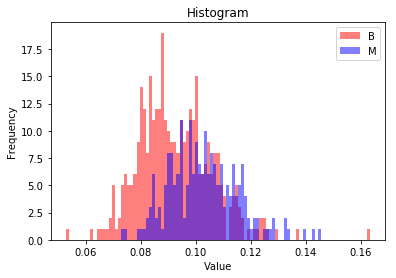

In [8]:
hs = Histogram()
hs.Plot(6)